In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
boston = fetch_openml(name = 'boston', version = 1, as_frame = True)
df = boston.frame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


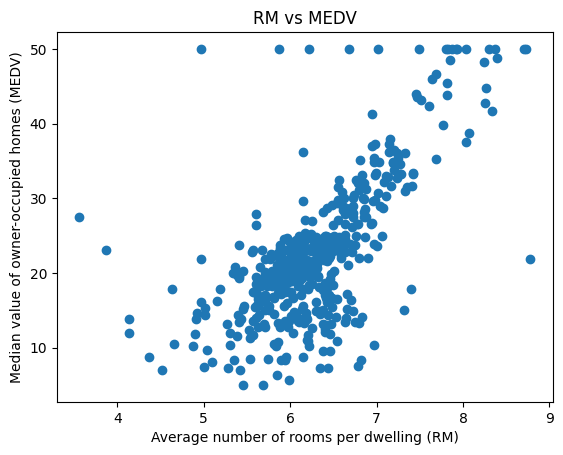

In [ ]:
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.title('RM vs MEDV')
plt.show()

BATCH GRADIENT DESCENT (BGD)

In [ ]:
X = boston.data.astype(float)
y = boston.target.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a bias term (a column of ones) to both training and testing sets
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [ ]:
alpha = 0.0000001 #learning rate
n_iterations = 10000
m_train = len(X_train)
theta = np.zeros(X_train_b.shape[1])

for i in range(n_iterations) :
  h_theta = X_train_b.dot(theta)
  error = h_theta -y_train
  gradient = (1/m_train) * X_train_b.T.dot(error)
  theta = theta - alpha * gradient

print("Final theta (coefficients):", theta)

Final theta (coefficients): [ 0.00075937 -0.01082776  0.04184579 -0.00693588  0.00045583  0.00022325
  0.00894414  0.00874362  0.00361762 -0.00285218  0.00024147  0.00618838
  0.05963879 -0.02486116]


In [ ]:
# Make predictions on the test set
y_pred = X_test_b.dot(theta)

# Print the predicted vs. expected values for the first 10 examples
print("Predicted vs. Expected (First 10 examples):")
for i in range(10):
    print(f"Predicted: {y_pred[i]:.2f}, Expected: {y_test.iloc[i]:.2f}")

Predicted vs. Expected (First 10 examples):
Predicted: 24.30, Expected: 23.60
Predicted: 25.73, Expected: 32.40
Predicted: 23.83, Expected: 13.60
Predicted: 23.42, Expected: 22.80
Predicted: 23.44, Expected: 16.10
Predicted: 22.82, Expected: 20.00
Predicted: 23.74, Expected: 17.80
Predicted: 23.49, Expected: 14.00
Predicted: 24.17, Expected: 19.60
Predicted: 24.20, Expected: 16.80


In [ ]:
# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE) on the test set: {mae:.2f}")


Mean Absolute Error (MAE) on the test set: 6.02


STOCHASTIC GRADIENT DESCENT : Exact specifics still undisclosed... can be done by self.

In [ ]:
theta_normal = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T.dot(y_train))
y_preds = X_test_b.dot(theta_normal)
mae = mean_absolute_error(y_test, y_preds)

In [ ]:
print("Predicted vs. Expected (First 10 examples):")
for i in range(10):
    print(f"Predicted: {y_preds[i]:.2f}, Expected: {y_test.iloc[i]:.2f}")

Predicted vs. Expected (First 10 examples):
Predicted: 29.00, Expected: 23.60
Predicted: 36.03, Expected: 32.40
Predicted: 14.82, Expected: 13.60
Predicted: 25.03, Expected: 22.80
Predicted: 18.77, Expected: 16.10
Predicted: 23.25, Expected: 20.00
Predicted: 17.66, Expected: 17.80
Predicted: 14.34, Expected: 14.00
Predicted: 23.01, Expected: 19.60
Predicted: 20.63, Expected: 16.80


In [ ]:
print(mae)

3.189091965887605
